https://compas.lh.or.kr/subj/competition/info?subjNo=SBJ_2411_001

# **[공공데이터] 공공주택 공유차량 적정 규모 산정 (부동산, 교통)**

---

<aside>
➕ **목차**

---

</aside>

### 01. 개요

---

- 공공주택 단지 내 공유차량 이용현황을 분석하고 이를 기반으로 적정 규모를 산정하는 프로젝트 입니다.
- 분석 결과는 하남시 교산지구의 공공주택 단지 내 공유차량 도입 및 운영 방안을 마련하는 데 활용됩니다.
- 해당 프로젝트 내용을 가지고 COMPAS 주관 경진대회에 지원해볼 수 있습니다 🙂
    - https://compas.lh.or.kr/subj/competition/info?subjNo=SBJ_2411_001

### 02. 배경

---

- 2016년 6월부터 공공주택 업무처리지침*에 따라 공공주택의 주차장 일부를 승용차 공동이용을 위한 전용주차 구획으로 정할 수 있게 되었습니다.
    - ※ 관련 조문: 공공주택 업무처리지침 제32조(주차장) 7호
- 이후 공유 차량 서비스는 환경문제·비용 절감 등을 고려하여 사용자 수와 차량 수가 지속적으로 증가하는 추세이며, 이에 따라 공공주택단지 내 입주민들의 공유 차량 이용량이 증가할 것으로 예상됩니다.
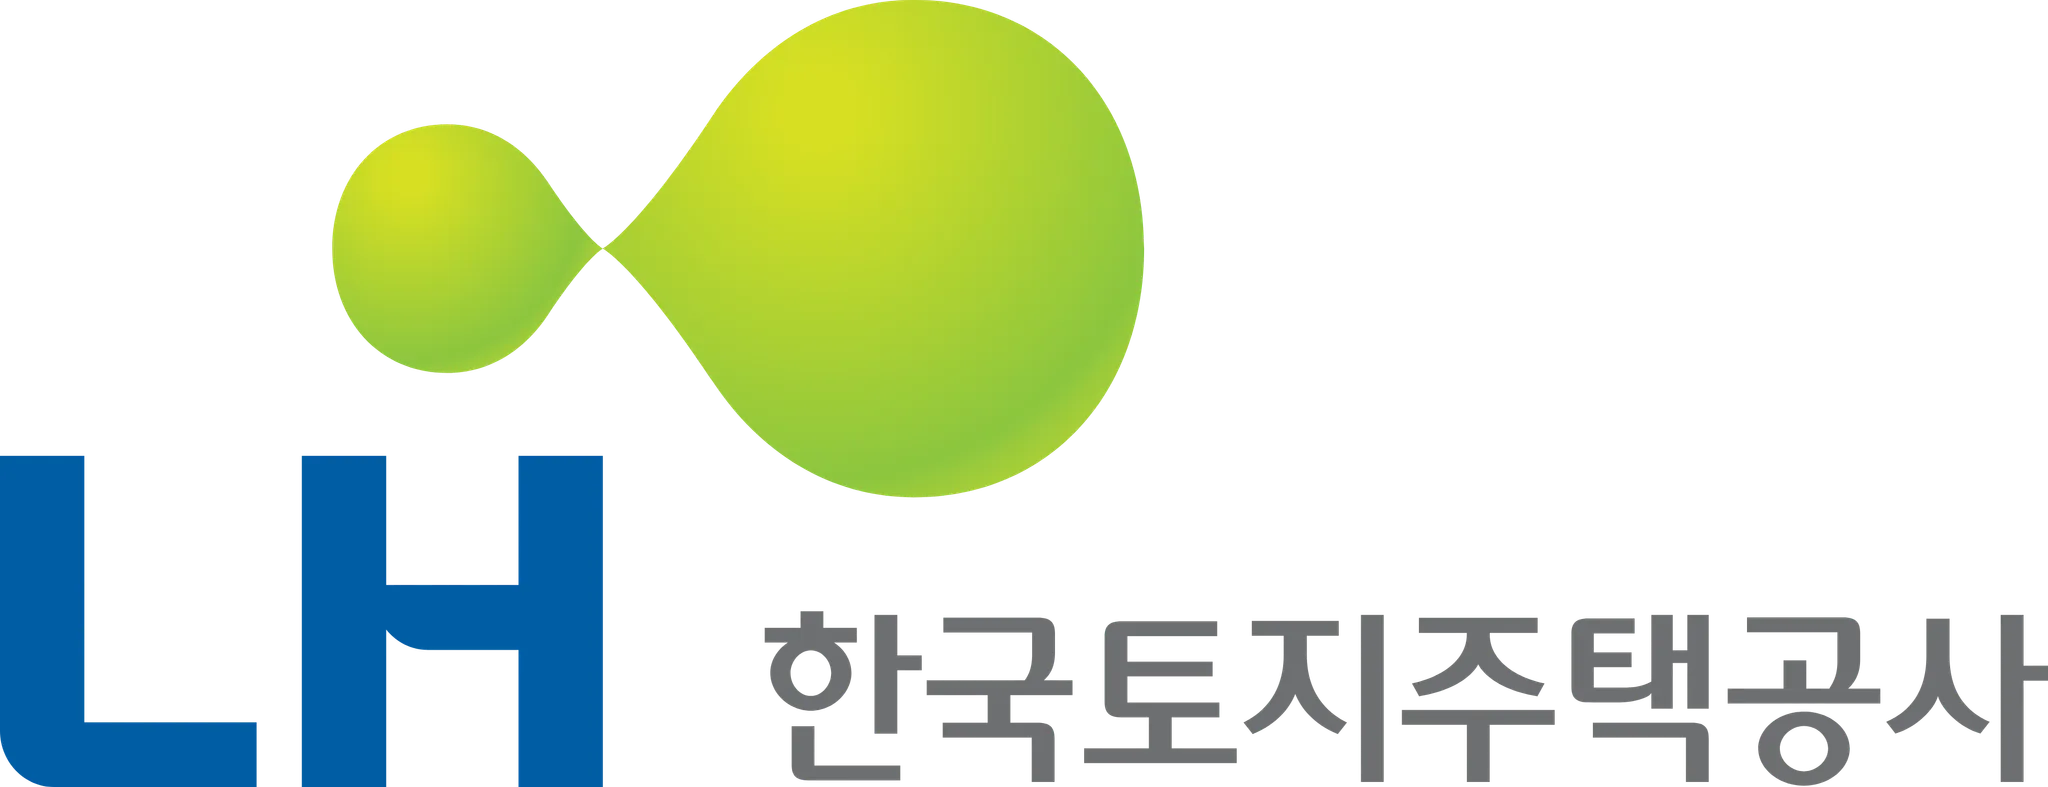

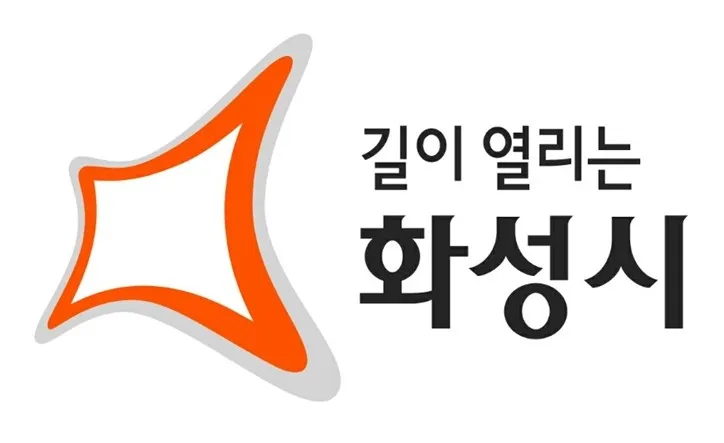

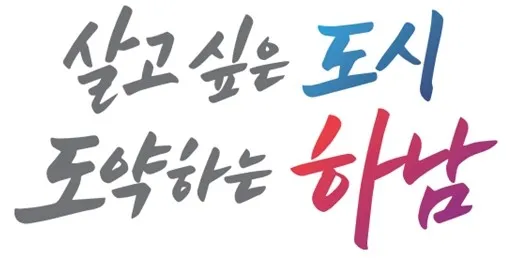


### 03. 주제

---

- **분석목적**
    - 화성시 공공주택 단지의 공유차량 이용현황을 분석하여 하남시 교산지구의 **적정 공유차량 규모**를 산정하는 것입니다.
- **분석내용**
    - **화성시 분석**
        - 공공주택 단지의 공급유형(국민, 공공, 행복, 영구)에 따른 공유차량 이용현황 분석
        - 대중교통 접근성, 교통량, 주변 상권 데이터를 포함한 종합 수요 분석
    - **하남시 교산지구 적용**
        - 화성시 분석 결과를 기반으로 하남시 교산지구의 적정 공유차량 규모를 예측

### 04. 설명

---

- **분석대상 지역**
    - 경기도 화성시
- **적용대상 지역**
    - 3기 신도시 하남 교산지구
- **분석 시 고려사항**
    - 공공주택 단지 공급유형별(국민, 공공, 행복, 영구) **적정 공유차량 규모 산정**
    - Python, 태블로 등을 활용해 분석 결과를 **시각화 및 보고**
    - 논문 및 외부 자료 활용 가능

### 05. 데이터 예시

---

- **데이터 출처**
    - https://compas.lh.or.kr/subj/competition/data?subjNo=SBJ_2411_001
- **제공 데이터**
    - 지역: 화성시, 하남시
    - 좌표계: WGS84 (EPSG:4326)
- **활용 데이터 예시**
    - 공공주택 단지별 공급유형 및 주차장 정보
    - 공유차량 이용 내역
    - 대중교통 접근성 데이터
    - 교통량 및 주변 상권 데이터
- **데이터 사용 가이드라인**
    - 외부 데이터 활용 시, **법적 제약이 없는 경우**에만 허용
- **제공 데이터셋 목록**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
data_path = '/Users/jun/GitStudy/Data_4/Data/'
sharecar_path = data_path + 'share_car/'

In [6]:
os.chdir(sharecar_path)
os.listdir()

['1-7.화성시_공영주차장.csv',
 '1-4.화성시_상권정보.csv',
 '2-14.하남시_격자.geojson',
 '2-1.하남시_거주인구.csv',
 '1-1.화성시_거주인구.csv',
 '2-7.하남시_공영주차장.csv',
 '3.대상구역도(하남교산).geojson',
 '1-3.화성시_상세도로망.geojson',
 '1-5.화성시_버스정류장.csv',
 '1-6.화성시_지하철역.csv',
 '2-5.하남시_버스정류장.csv',
 '2-4.하남시_상권정보.csv',
 '1-2.화성시_추정교통량.csv',
 '2-3.하남시_상세도로망.geojson',
 '2-6.하남시_지하철역.csv',
 '1-14.화성시_격자.geojson',
 '2-2.하남시_추정교통량.csv']

In [7]:
pd.read_csv('1-7.화성시_공영주차장.csv')

,carpark_nm,carpark_type,slots,lon,lat
0,마도바이오밸리1,노외,162,126.764183,37.170522
1,마도바이오밸리,노외,190,126.772358,37.171229
2,두곡리,노외,39,126.775263,37.207509
3,사강,노외,49,126.735719,37.213753
4,송산,노외,46,126.733585,37.214617
...,...,...,...,...,...
96,융건릉(2),노외,150,126.989814,37.207157
97,용주사(송산동),노외,142,127.005906,37.209630
98,봉담 상리 2,노외,214,126.945377,37.225307
99,봉담 상리 1,노외,186,126.944892,37.226041


In [8]:
pd.read_csv('1-4.화성시_상권정보.csv')

,com_lc_cd,com_lc_nm,com_mc_cd,com_mc_nm,com_sc_cd,com_sc_nm,ksic_cd,ksic_nm,emd_cd,emd_nm,road_address,lon,lat,std_year
0,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,NaN,4159036000,팔탄면,경기도 화성시 팔탄면 서해로987번길 7,126.891262,37.149846,2021
1,D,소매,D01,음/식료품소매,D01A01,식료품점,G47219,기타 식료품 소매업,4159034000,송산면,경기도 화성시 송산면 당성로 571,126.723828,37.208587,2021
2,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,화장품 및 방향제 소매업,4159058500,동탄1동,경기도 화성시 동탄공원로3길 18-23,127.062309,37.207623,2021
3,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,"컴퓨터 및 주변장치, 소프트웨어 소매업",4159025900,향남읍,경기도 화성시 향남읍 평1길 16,126.909272,37.132694,2021
4,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,한식 음식점업,4159025900,향남읍,경기도 화성시 향남읍 행정중앙1로 14,126.916244,37.125963,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130871,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,41590256,우정읍,경기도 화성시 우정읍 기아자동차로 95,126.788963,37.039253,2024
130872,G2,소매,G211,가구 소매,G21101,가구 소매업,G47520,가구 소매업,41590590,동탄5동,경기도 화성시 동탄기흥로520번가길 17-1,127.093276,37.208820,2024
130873,I2,음식,I210,기타 간이,I21003,피자,I56192,피자; 햄버거; 샌드위치 및 유사 음식점업,41590587,동탄3동,경기도 화성시 효행로 1260,127.060238,37.221088,2024
130874,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,41590630,동탄9동,경기도 화성시 동탄물류1로 13,127.126245,37.172230,2024


In [ ]:
pd.read_csv('2-1.하남시_거주인구.csv')

,gid,year,m_20g_pop,w_20g_pop,m_30g_pop,w_30g_pop,m_40g_pop,w_40g_pop,m_50g_pop,w_50g_pop,m_60g_pop,w_60g_pop,m_70g_pop,w_70g_pop,m_80g_pop,w_80g_pop,m_90g_pop,w_90g_pop,m_100g_pop,w_100g_pop
0,다사710491,2023,0.0,0.0,NaN,0.0,0.0,0.0,7.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,다사732511,2023,6.0,10.0,13.0,13.0,20.0,32.0,16.0,17.0,10.0,8.0,6.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN
2,다사703464,2023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,다사734504,2023,12.0,0.0,0.0,9.0,10.0,9.0,11.0,12.0,23.0,20.0,9.0,19.0,0.0,8.0,0.0,0.0,NaN,NaN
4,다사731458,2023,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38531,다사755436,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38532,다사766500,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38533,다사744460,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38534,다사771452,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.read_csv('1-1.화성시_거주인구.csv')

,gid,year,m_20g_pop,w_20g_pop,m_30g_pop,w_30g_pop,m_40g_pop,w_40g_pop,m_50g_pop,w_50g_pop,m_60g_pop,w_60g_pop,m_70g_pop,w_70g_pop,m_80g_pop,w_80g_pop,m_90g_pop,w_90g_pop,m_100g_pop,w_100g_pop
0,다사385011,2023,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,다사312110,2023,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,다사473033,2023,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다사602117,2023,10.0,7.0,15.0,6.0,6.0,9.0,6.0,7.0,0.0,9.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN
4,다사476205,2023,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285531,다사513058,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285532,다사553001,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285533,다사517088,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285534,다사456150,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.read_csv('2-7.하남시_공영주차장.csv')

,carpark_nm,carpark_type,slots,lon,lat
0,하남프라자 주변,노상,63,127.208296,37.551446
1,에코1단지 주변,노상,46,127.208497,37.541546
2,한솔솔파크 이면도로,노상,52,127.201465,37.542955
3,하남순복음교회 주변,노상,8,127.203219,37.534775
4,(구)국도43번호선공영주차장,노상,73,127.213648,37.534042
5,현충탑 진입로,노상,95,127.230025,37.535104
6,시립테니스장 주변 공영주차장,노상,69,127.212862,37.538559
7,검단산로(창우동안말),노상,16,127.233639,37.539333
8,신장동 공영주차장,노외,89,127.214237,37.541376
9,동일하이빌아파트 이면도로,노상,18,127.219208,37.541545


In [13]:
pd.read_csv('2-4.하남시_상권정보')

FileNotFoundError: [Errno 2] No such file or directory: '2-4.하남시_상권정보'